In [ ]:
import sys
import os

sys.path.append(os.path.abspath("..")) 

import torch
from engine import DatasetProvider, Trainer, DatasetName
from models.LeNet import LeNetV2, LeNetV3
from utils.get_gpu import get_gpu
from utils.count_params import count_params
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [23]:
dataset = DatasetProvider(dataset_name=DatasetName.CIFAR, batch_size=128, resize=32)

dataset

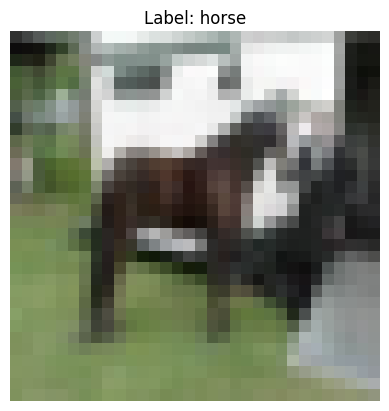

In [24]:
test_dataset = dataset.testloader.dataset
img, label = test_dataset[20]
img_display = img.permute(1, 2, 0)
img_display = img_display * 0.5 + 0.5 
classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')
plt.imshow(img_display)
plt.title(f"Label: {classes[label]}")
plt.axis('off')
plt.show()

In [25]:
img_display.shape

torch.Size([32, 32, 3])

In [26]:
model = LeNetV2(out_features=10, in_channels=3)
model

LeNetV2(
  (net): Sequential(
    (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (relu1): ReLU()
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (relu2): ReLU()
    (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (fc1): Linear(in_features=400, out_features=120, bias=True)
    (relu3): ReLU()
    (fc2): Linear(in_features=120, out_features=84, bias=True)
    (relu4): ReLU()
    (fc3): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [27]:
trainer = Trainer(
    model=model,
    dataset=dataset,
    loss_name="cross_entropy",
    optimizer_name="adam",
    device=get_gpu(),
    lr=0.001
)

╭─ Experiment Config ─╮
│ Starting Training   │
│ Model: LeNetV2      │
│ Dataset: cifar10    │
│ Device: mps         │
╰─────────────────────╯

In [28]:
trainer.train(max_epochs=50)

Output()

✔ Training Complete!

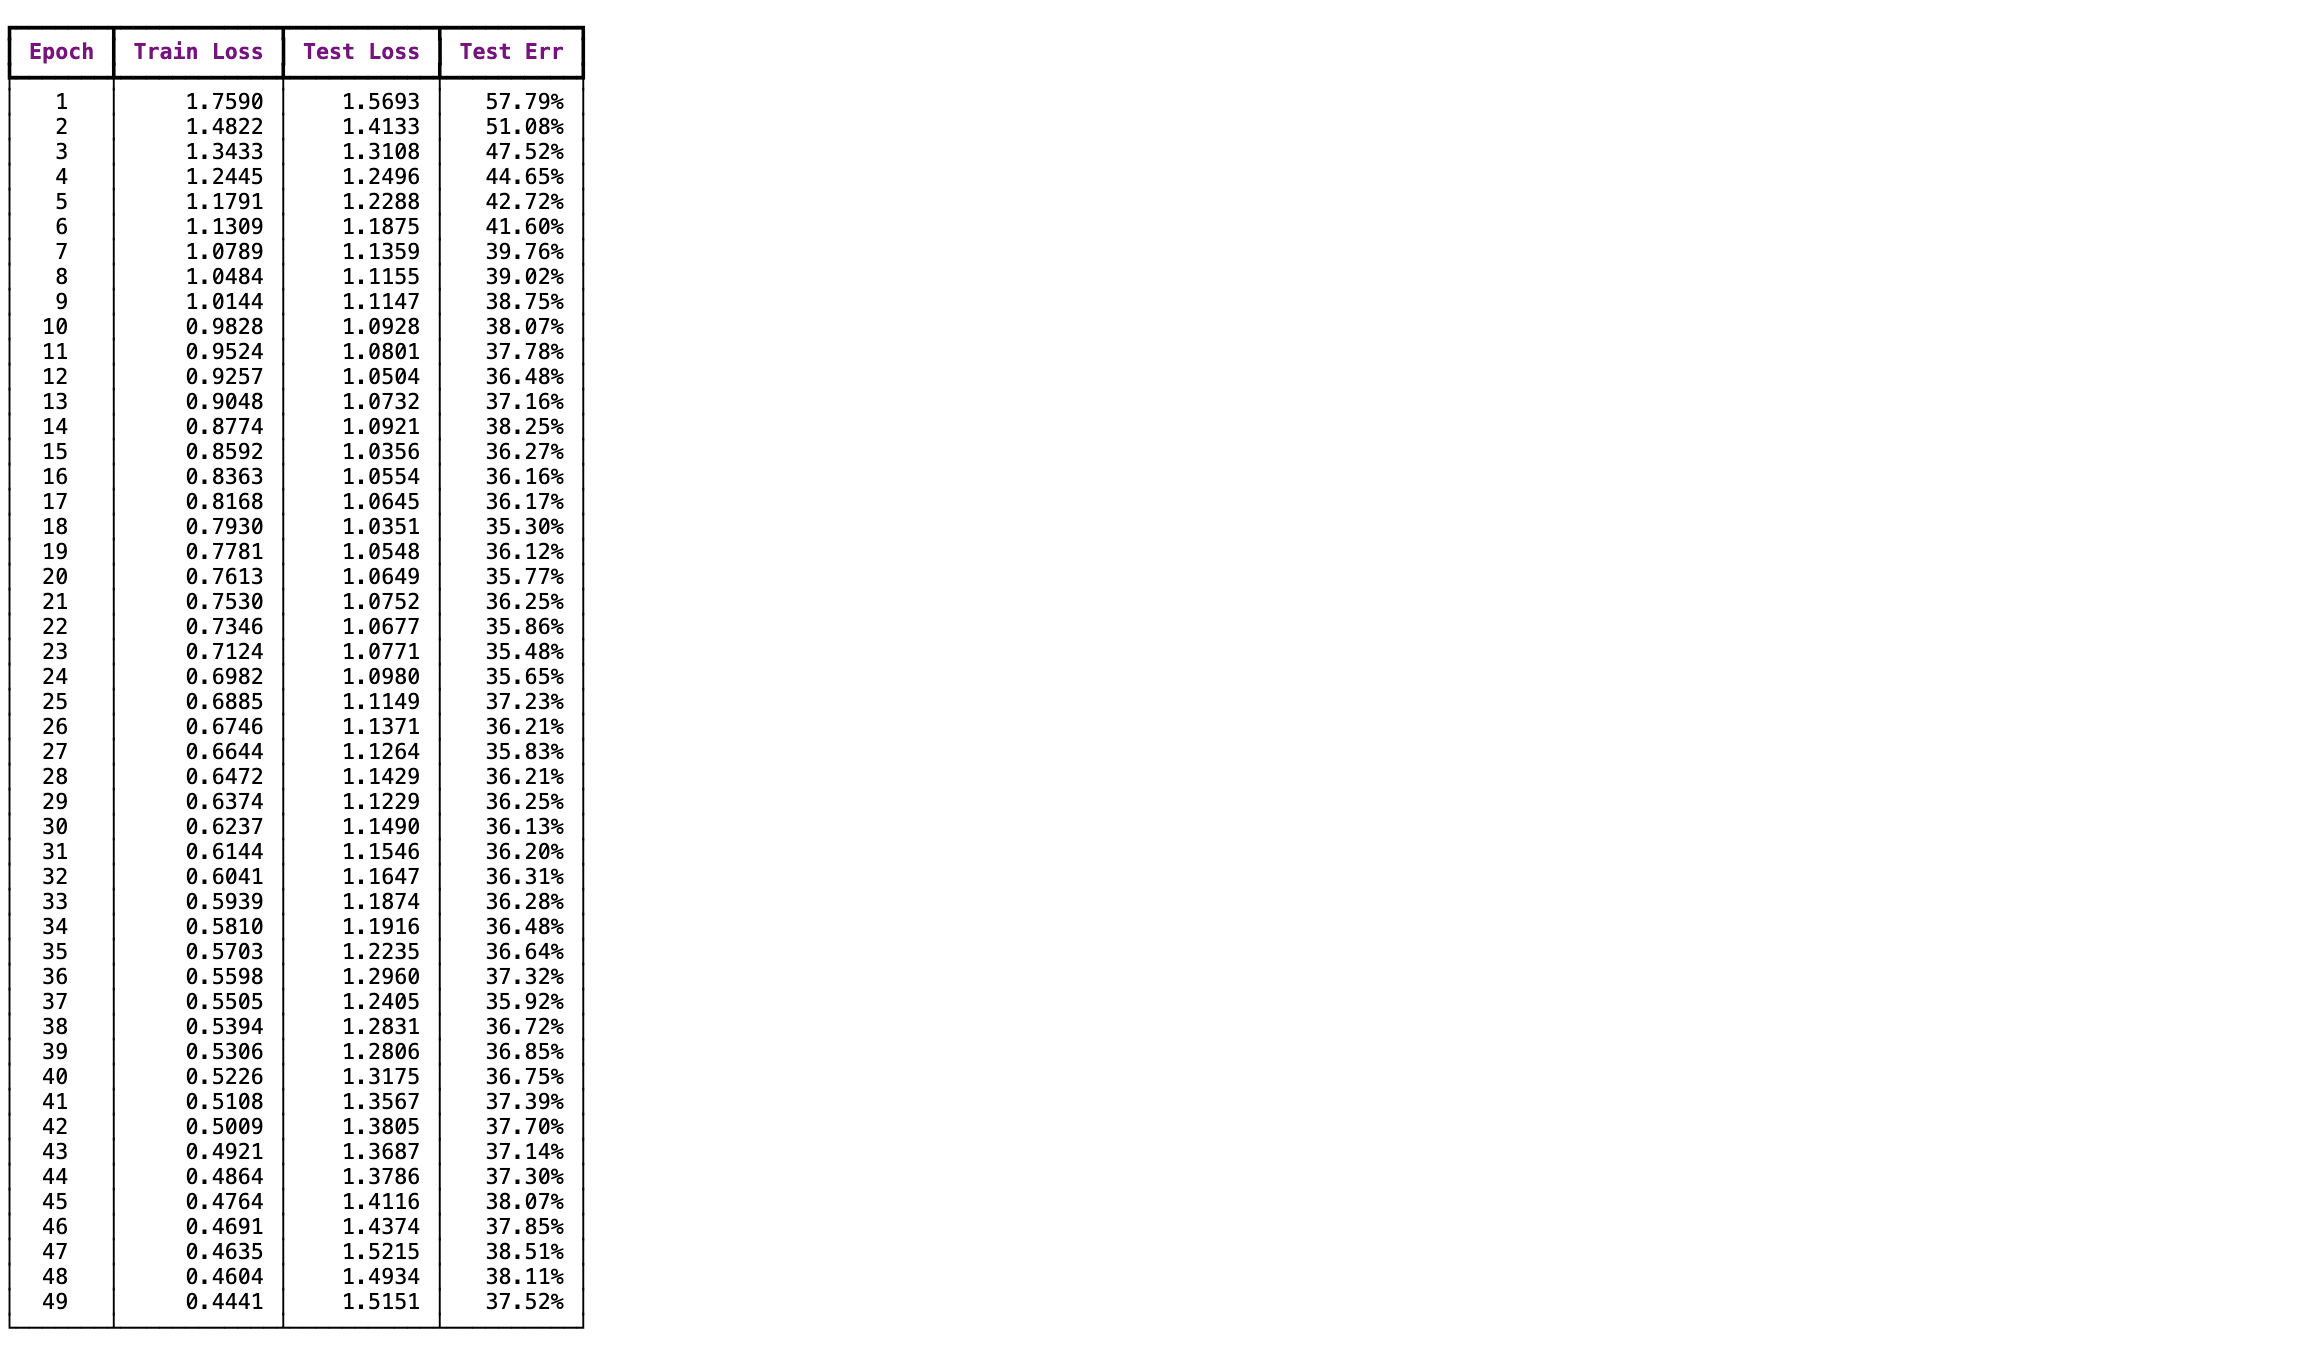

In [30]:
torch.save(model.state_dict(), "lenet_v2_cifar.pth")

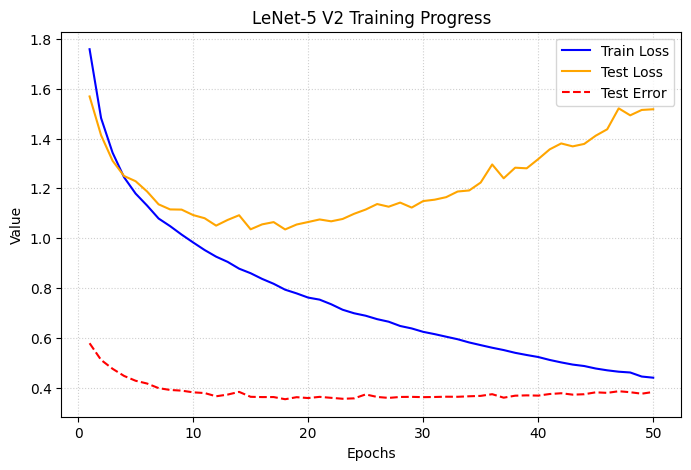

In [32]:
train_losses = trainer.history["train_loss"]
val_losses = trainer.history["val_loss"]
val_err = trainer.history["val_err"]

epochs = range(1, len(train_losses) + 1)

fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(epochs, train_losses, label='Train Loss', color='blue')
ax.plot(epochs, val_losses, label='Test Loss', color='orange')
ax.plot(epochs, val_err, label='Test Error', color='red', linestyle='--')

ax.set_title('LeNet-5 V2 Training Progress')
ax.set_xlabel('Epochs')
ax.set_ylabel('Value')
ax.grid(True, linestyle=':', alpha=0.6)
ax.legend()

plt.show()

As we can see - model is overfitted, the best result was ~35% error rate.

In [33]:
count_params(model.net)

Layer Name      | weight       | bias         | Total     
----------------------------------------------------------
conv1           | 450          | 6            | 456       
conv2           | 2400         | 16           | 2416      
fc1             | 48000        | 120          | 48120     
fc2             | 10080        | 84           | 10164     
fc3             | 840          | 10           | 850       
----------------------------------------------------------
TOTAL           |                              | 62006     


In [42]:
model = LeNetV3(in_channels=3, out_features=10)

In [40]:
count_params(model.net)

Layer Name      | weight       | bias         | Total     
----------------------------------------------------------
conv1           | 900          | 12           | 912       
conv2           | 2592         | 24           | 2616      
fc1             | 172800       | 200          | 173000    
fc2             | 20000        | 100          | 20100     
fc3             | 1000         | 10           | 1010      
----------------------------------------------------------
TOTAL           |                              | 197638    


In [43]:
trainer = Trainer(
    model=model,
    dataset=dataset,
    loss_name="cross_entropy",
    optimizer_name="adam",
    device=get_gpu(),
    lr=0.0001
)

trainer.train(max_epochs=35)

╭─ Experiment Config ─╮
│ Starting Training   │
│ Model: LeNetV3      │
│ Dataset: cifar10    │
│ Device: mps         │
╰─────────────────────╯

Output()

✔ Training Complete!

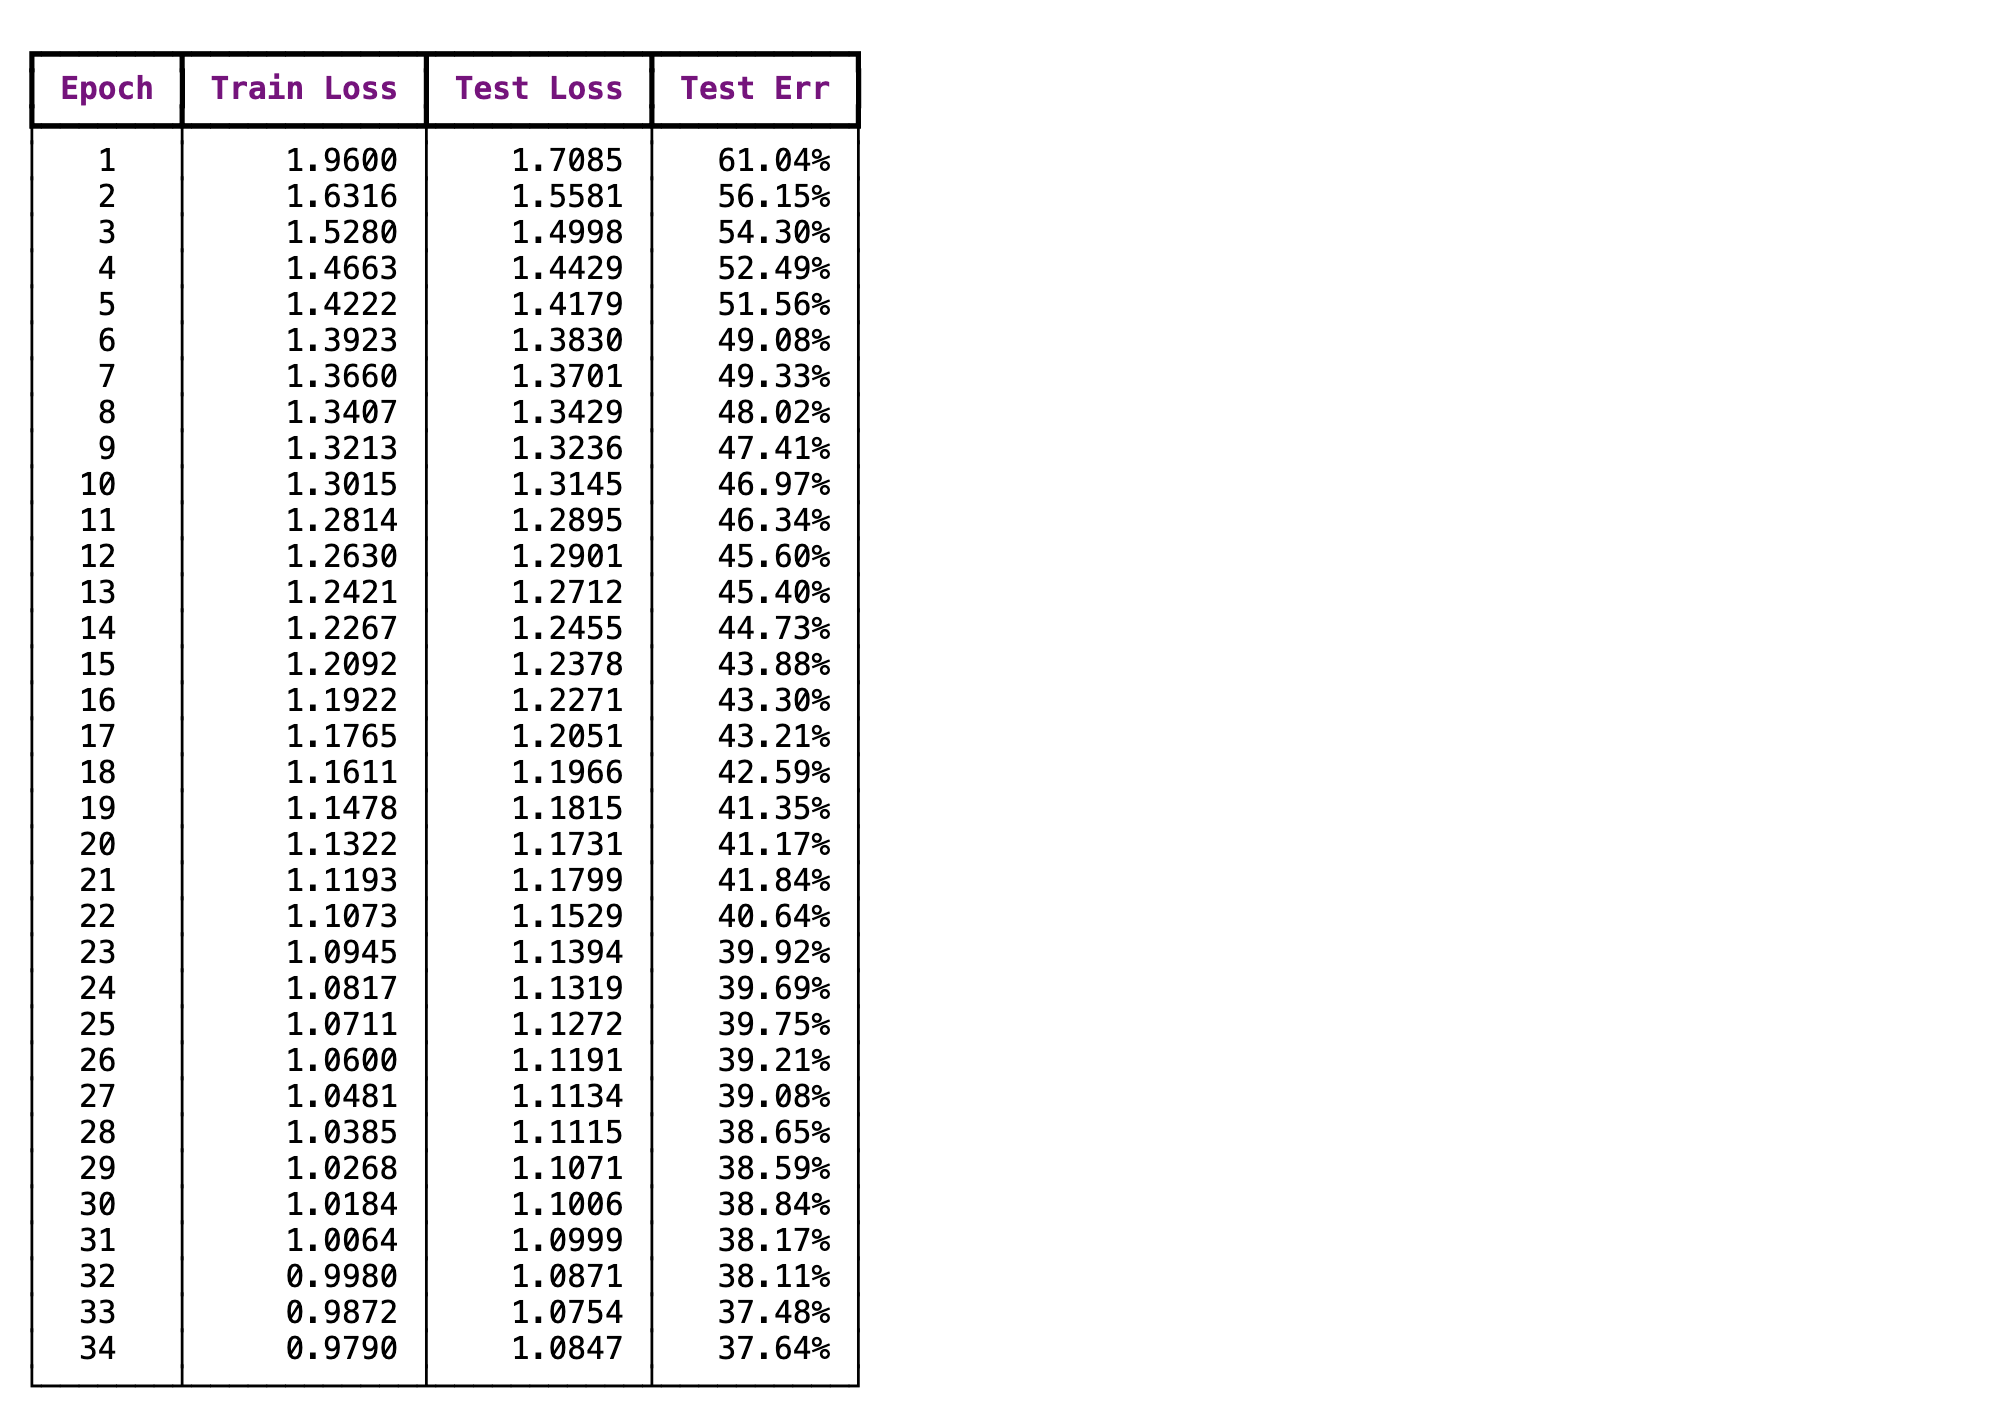

In [44]:
model = LeNetV3(in_channels=3, out_features=10)

trainer = Trainer(
    model=model,
    dataset=dataset,
    loss_name="cross_entropy",
    optimizer_name="adam",
    device=get_gpu(),
    lr=0.001
)

trainer.train(max_epochs=10)

╭─ Experiment Config ─╮
│ Starting Training   │
│ Model: LeNetV3      │
│ Dataset: cifar10    │
│ Device: mps         │
╰─────────────────────╯

Output()

✔ Training Complete!

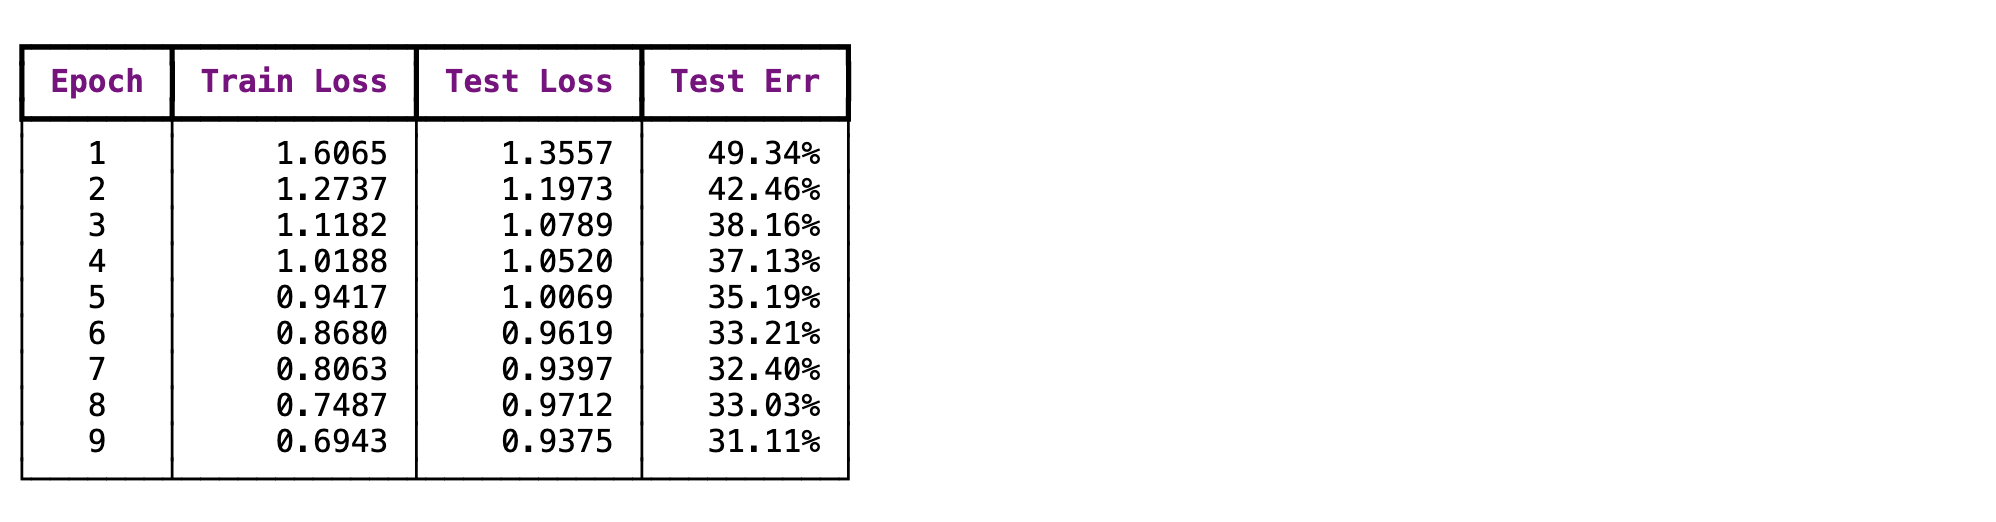

So we can make an conclusion, that adding more params can increase the generalization